In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## PRESENTATION LAYER

df_holdings = pd.read_csv("../DATA/GOLD/Holdings.csv", index_col=0, parse_dates=["date"])
df_invested = pd.read_csv("../DATA/GOLD/Invested.csv", index_col=0, parse_dates=["date"])
df_stockprice = pd.read_csv(
    "../DATA/GOLD/StockPrice.csv", index_col=0, parse_dates=["date"]
)

In [3]:
# multiply
df_investment = df_holdings.multiply(df_invested)
# Add the sum column
df_investment["investment"] = df_investment.sum(axis=1)

# multiply
df_stock_value = df_holdings.multiply(df_stockprice)
# Add the sum column
df_stock_value["stock_value"] = df_stock_value.sum(axis=1)

In [4]:
df = df_investment[["investment"]].join(df_stock_value[["stock_value"]])
df["pl"] = df["stock_value"]  / df["investment"] *100
df = df.round(2)
df = df[df["stock_value"] > 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 880 entries, 2020-04-21 to 2023-10-27
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   investment   880 non-null    float64
 1   stock_value  880 non-null    float64
 2   pl           880 non-null    float64
dtypes: float64(3)
memory usage: 27.5 KB


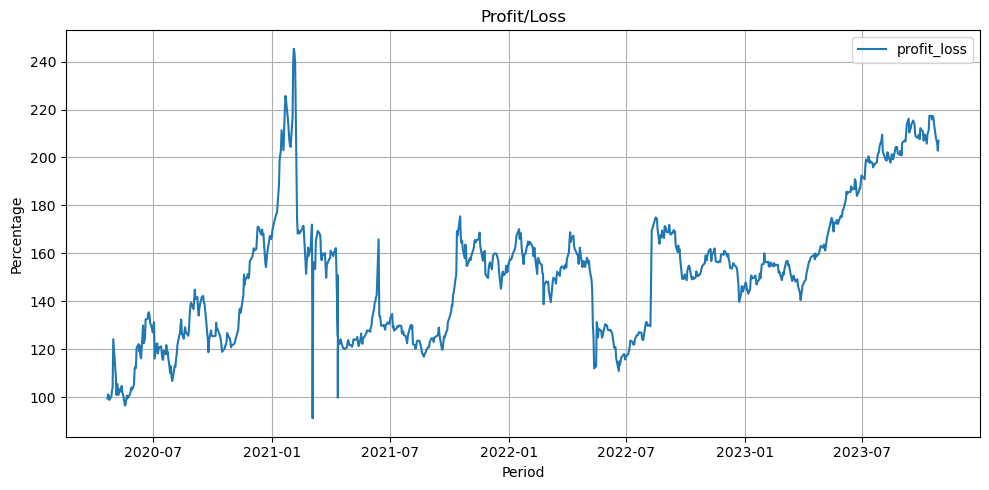

In [5]:
plt.figure(figsize=(10, 5))
# plot individual lines
plt.plot(df.index, df["pl"], label='profit_loss')

# add legend
plt.legend()
# add axis labels and a title
plt.ylabel("Percentage")
plt.xlabel("Period")
plt.title("Profit/Loss")

# display plot
plt.grid()  # draw grid for major ticks
plt.tight_layout()
plt.show()

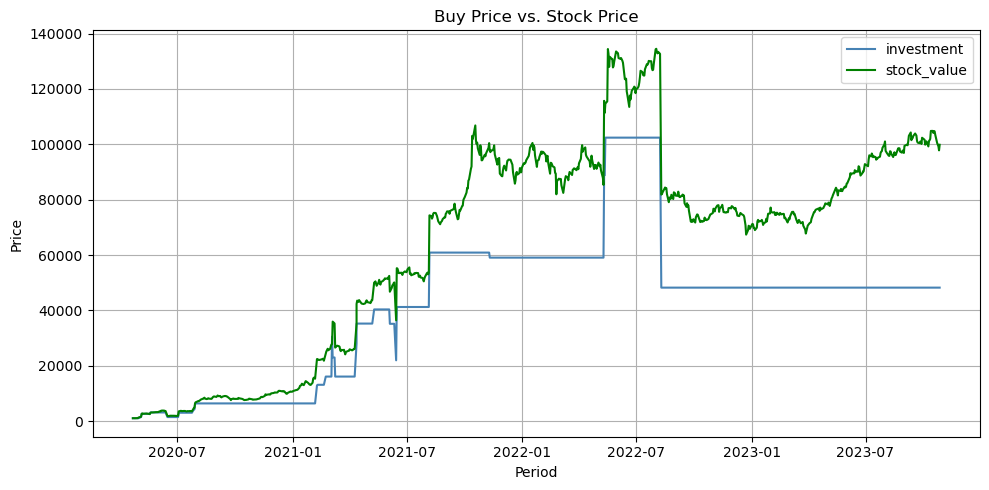

In [6]:
plt.figure(figsize=(10, 5))
# plot individual lines
plt.plot(df.index, df["investment"], label="investment", color="steelblue")
plt.plot(df.index, df["stock_value"], label="stock_value", color="green")

# add legend
plt.legend()
# add axis labels and a title
plt.ylabel("Price")
plt.xlabel("Period")
# plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 90-degrees
plt.title("Buy Price vs. Stock Price")

# display plot
plt.grid()  # draw grid for major ticks
plt.tight_layout()
plt.show()